# Feature Engineering

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# using the Ames_Housing_Data1.tsv we dwnloaded earlier
df = pd.read_csv('data/Ames_Housing_Data1.tsv', sep='\t')

In [10]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [11]:
#retain a copy of data for comparision
data = df.copy()

## Basic Feature Engineering

Converting Catogrical Data to dummies
Making Skew vairables symmetric

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [13]:
# identifying categorical variables
one_hot_encode_col = df.dtypes[df.dtypes == object]
one_hot_encode_col = one_hot_encode_col.index.to_list()

In [14]:
#checkout some of the labels in your categorical columns
df[one_hot_encode_col].head().T

,0,1,2,3,4
MS Zoning,RL,RL,RH,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,IR1,Reg
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Corner,Inside,Corner,Corner
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,NAmes
Condition 1,Norm,Norm,Feedr,Norm,Norm


In [15]:
# one-hot-encode the columns we found using get_dummies()
df = pd.get_dummies(df, columns=one_hot_encode_col, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2931.0,1.465000e+03,8.462506e+02,1.0,732.5,1465.0,2.197500e+03,2.930000e+03
PID,2931.0,7.144003e+08,1.887306e+08,526301100.0,528477015.0,535453210.0,9.071811e+08,1.007100e+09
MS SubClass,2931.0,5.737462e+01,4.263634e+01,20.0,20.0,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2441.0,6.925399e+01,2.340568e+01,21.0,58.0,68.0,8.000000e+01,3.130000e+02
Lot Area,2931.0,1.015530e+04,7.888789e+03,1300.0,7440.5,9439.0,1.155600e+04,2.152450e+05
Overall Qual,2931.0,6.094848e+00,1.410786e+00,1.0,5.0,6.0,7.000000e+00,1.000000e+01
Overall Cond,2931.0,5.562948e+00,1.111396e+00,1.0,5.0,5.0,6.000000e+00,9.000000e+00
Year Built,2931.0,1.971352e+03,3.024093e+01,1872.0,1954.0,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2931.0,1.984258e+03,2.086154e+01,1950.0,1965.0,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2908.0,1.019003e+02,1.790819e+02,0.0,0.0,0.0,1.640000e+02,1.600000e+03


### Log Transforming
This is done for Ordinal Data, i.e, datatype = numeric

In [16]:
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75
skew_vals = data[float_cols].skew()

In [17]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit))
)

In [18]:
skew_cols
# these columns have a high skew which means they need to be scaled using log()

,Skew
BsmtFin SF 2,4.140794
Bsmt Half Bath,3.941592
Mas Vnr Area,2.607370
Lot Frontage,1.498775
BsmtFin SF 1,1.415875
Total Bsmt SF,1.156333
Bsmt Unf SF,0.923445


[Text(0.5, 1.0, 'After np.log1p'),
 Text(0.5, 0, 'value'),
 Text(0, 0.5, 'frequency')]

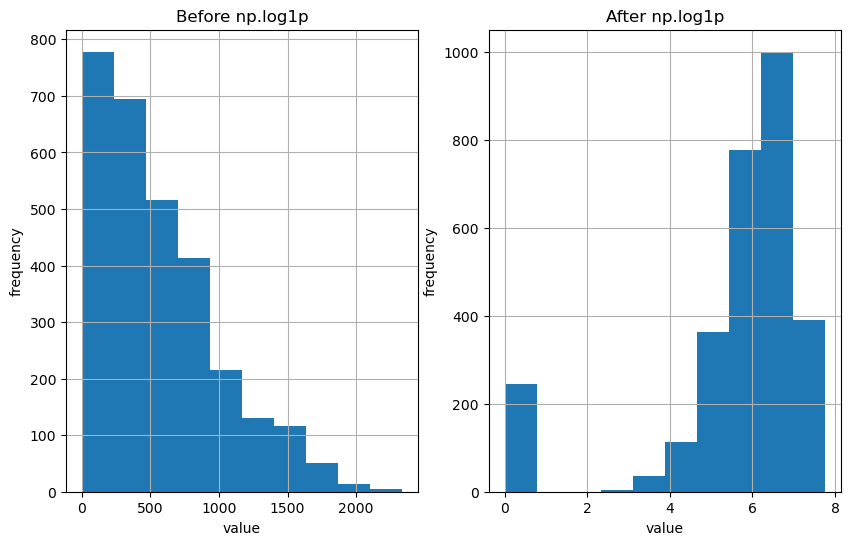

In [19]:
# affects of scaling visualised with a graph
field = 'Bsmt Unf SF'

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
df[field].hist(ax=ax1)
df[field].apply(np.log1p).hist(ax=ax2)

ax1.set(title='Before np.log1p', xlabel='value', ylabel='frequency')
ax2.set(title='After np.log1p', xlabel='value', ylabel='frequency')

In [20]:
#applying the log transformation to columns
for col in skew_cols.index.values:
    if col == 'SalePrice':
        continue
    df[col] = df[col].apply(np.log1p)

In [21]:
df.shape

(2931, 263)

Picking a few features to demonstrate feature scaling

In [22]:
subset_df = df.loc[:, ['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [23]:
subset_df.info()
# there is a nullvalue in Garage Cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2931 non-null   int64  
 1   Overall Qual    2931 non-null   int64  
 2   Overall Cond    2931 non-null   int64  
 3   Year Built      2931 non-null   int64  
 4   Year Remod/Add  2931 non-null   int64  
 5   Gr Liv Area     2931 non-null   int64  
 6   Full Bath       2931 non-null   int64  
 7   Bedroom AbvGr   2931 non-null   int64  
 8   Fireplaces      2931 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2931 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 252.0 KB


In [24]:
#impute missing value with int(mean)
subset_df['Garage Cars'].fillna(int(subset_df['Garage Cars'].mean()), inplace=True)

/var/folders/28/y7rzw6bx5v50lt2qvk32ntxm0000gn/T/ipykernel_33658/1971091687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_df['Garage Cars'].fillna(int(subset_df['Garage Cars'].mean()), inplace=True)


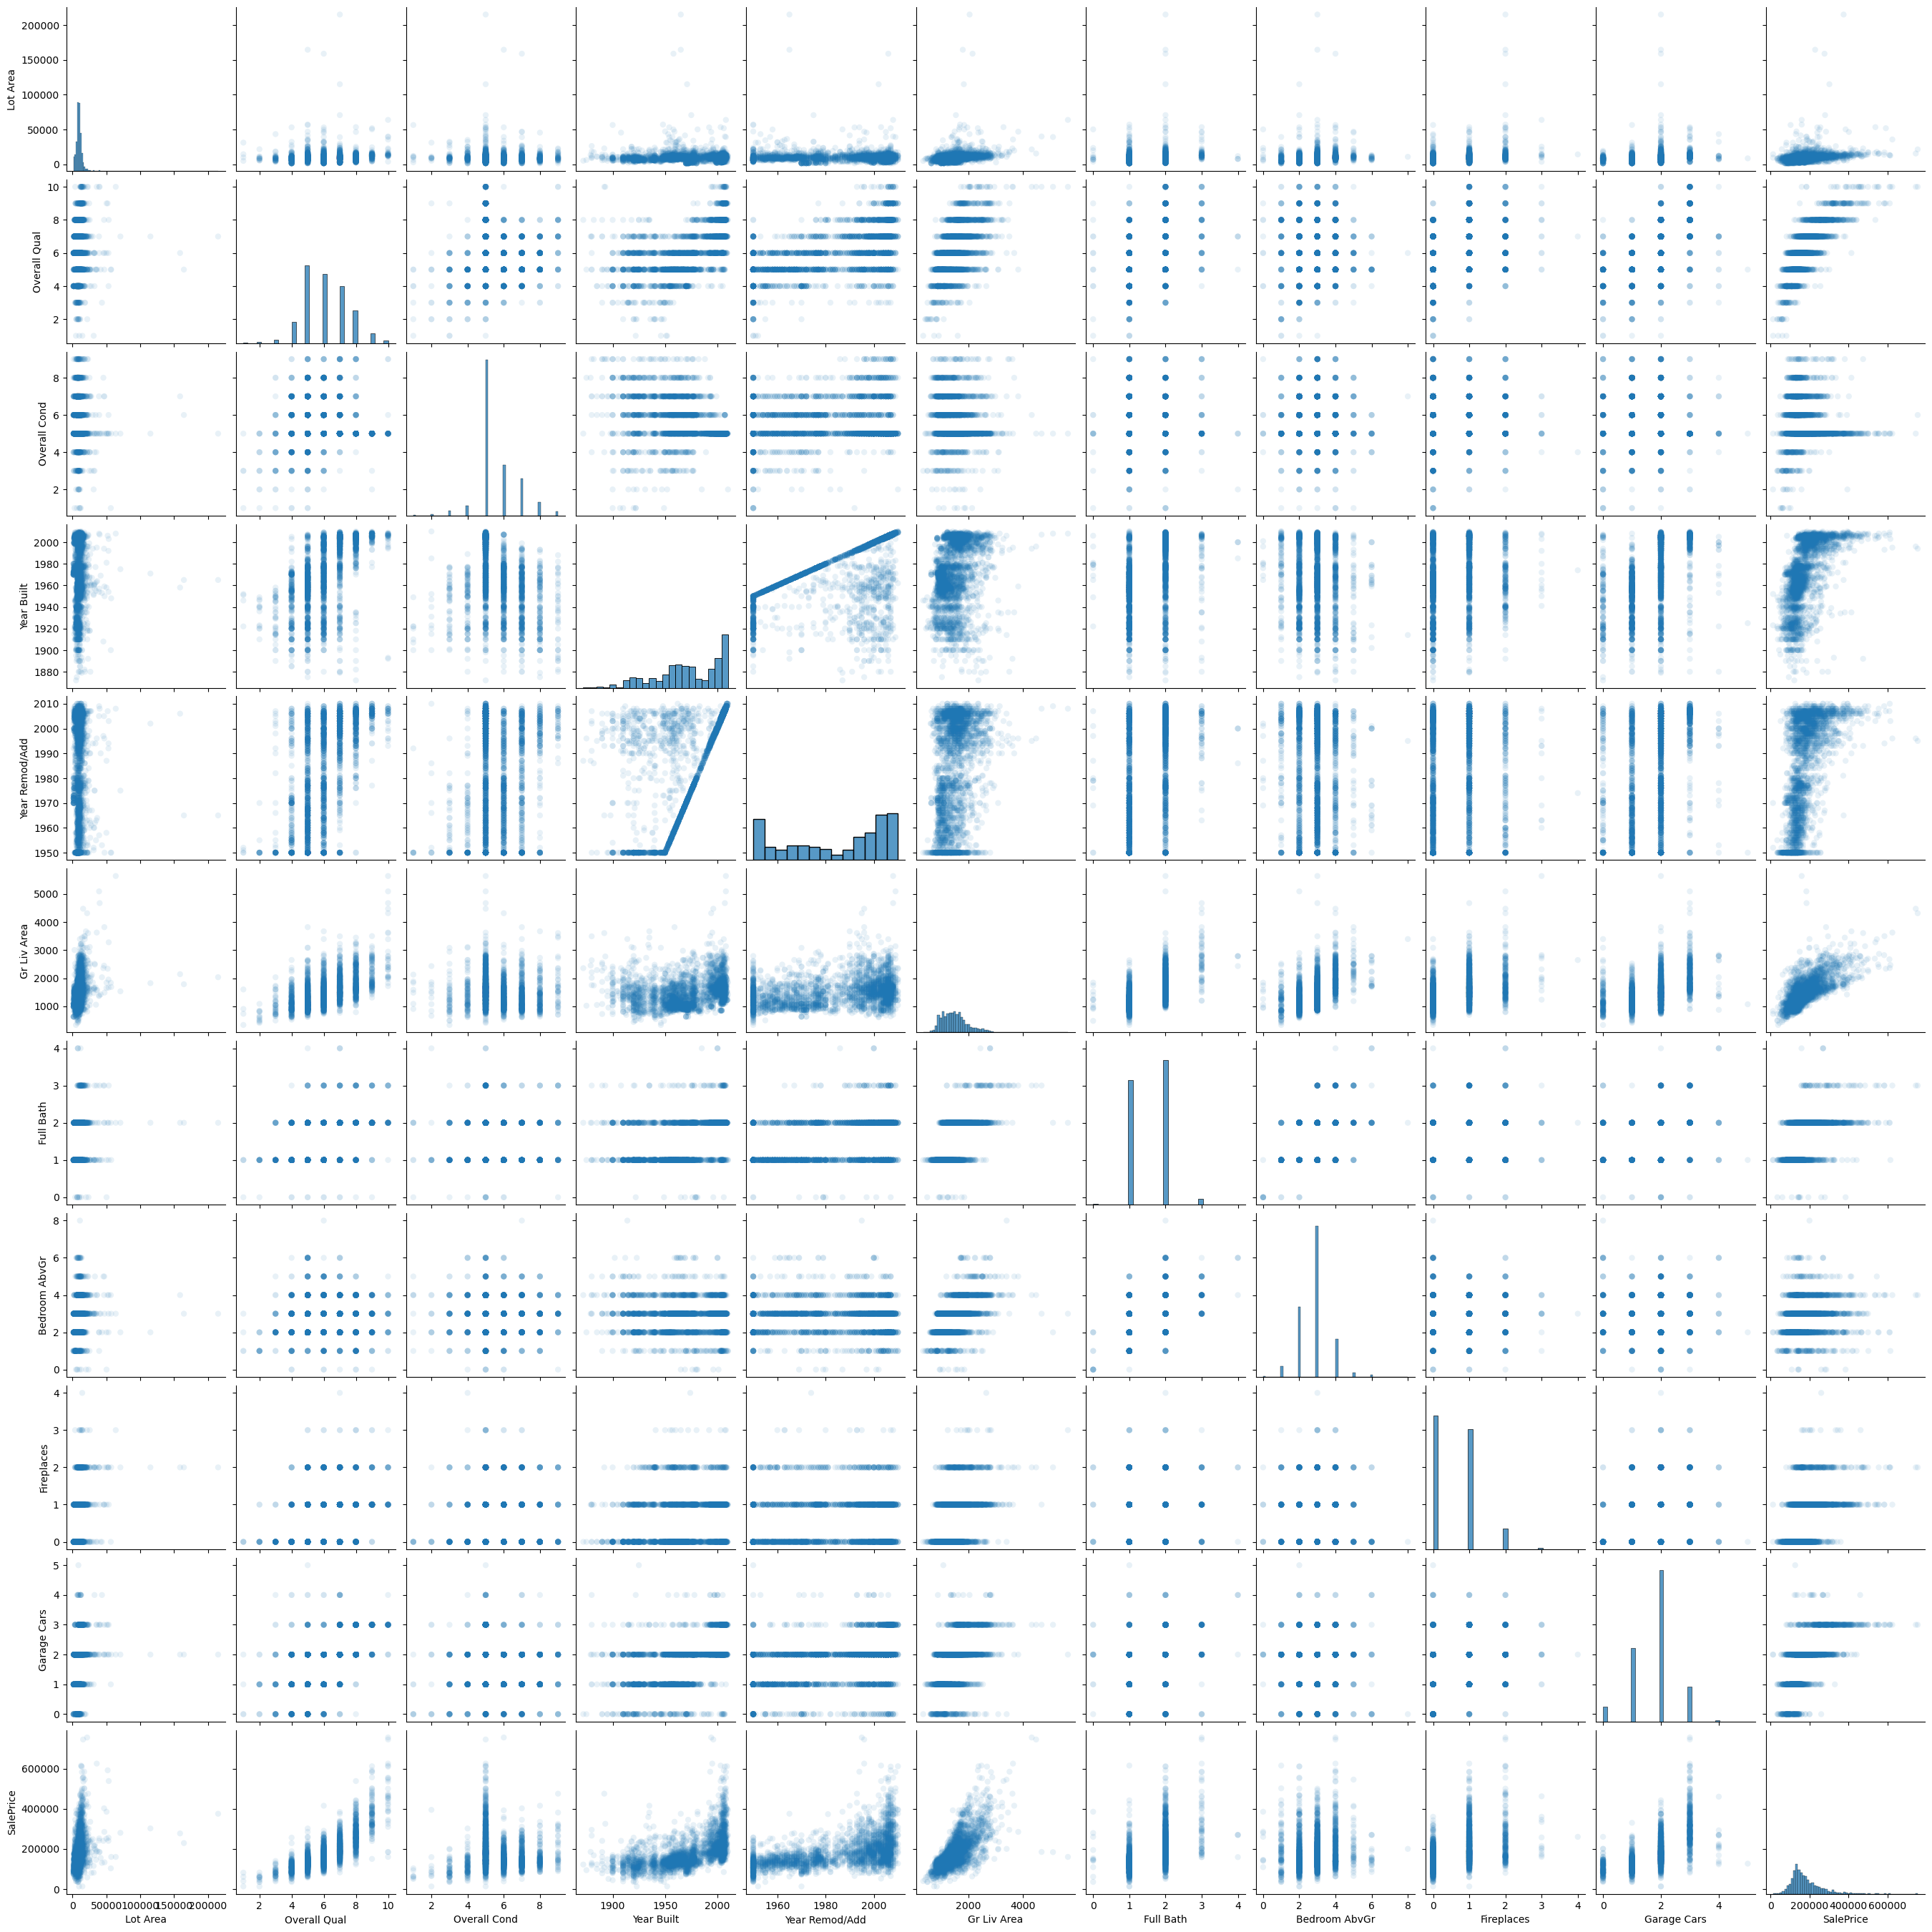

In [25]:
sns.pairplot(subset_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [26]:
#making seperate vaariables for features and target variables
x = subset_df.loc[:, ['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = subset_df['SalePrice']

In [27]:
# observing the graphs we observe some variables have polynomial relations
x2 = x.copy()

x2['OQ2'] = x2['Overall Qual'] ** 2
x2['GLA2'] = x2['Gr Liv Area'] ** 2

In [28]:
# you can create different features using relations of existing variables
X3 = x2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

## Fancier Features

In [29]:
# this feature calculates the deviation between 2 features, and creates it as a new features

def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [30]:
X5 = x2.copy()
X5['House Style'] = x['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


KeyError: 'House Style'

## Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2)

In [ ]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])
# this returns a object which can be used to access all the polynomial feautures

NameError: name 'df' is not defined

In [ ]:
# to see the feature names
pf.get_feature_names_out()

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
feature_array = pf.transform(df[features])
pd.DataFrame(feature_array, columns=pf.get_feature_names_out())

NameError: name 'df' is not defined